## Gaussian Naive Bayes

 - Used when we have Data with Numerical Features
 - Assumes that each feature follows a Gaussian(normal) distribution

In [2]:
import pandas as pd
import numpy as np

### Load the data

In [3]:
iris_data = pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


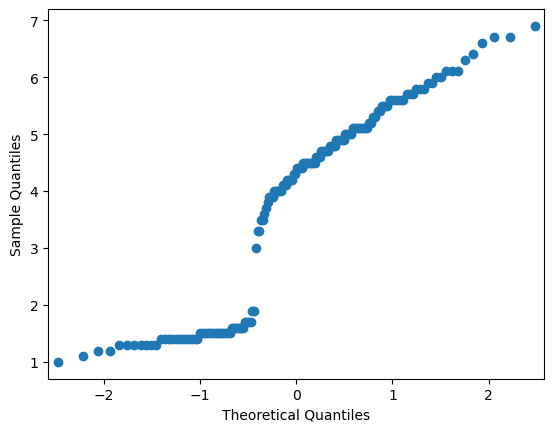

In [37]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(iris_data['PetalLengthCm'])
plt.show()

In [4]:
#separate features and target variable
x = iris_data.drop(['Id', 'Species'], axis=1)
y= iris_data['Species']

### Create train and test sets

In [5]:
#create train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=56)

### Implement Gaussian Naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

#train the model and make predictions
naive_bayes.fit(x_train, y_train)
predictions = naive_bayes.predict(x_test)

In [7]:
# calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9333333333333333

## Multinomial Naive Bayes

- The features are count-based (e.g., word frequency, term frequency-inverse document frequency (TF-IDF)).
- The data is categorical or represent counts of occurrences.
- Commonly used in natural language processing tasks such as text classification and sentiment analysis.

### Load the dataset

In [8]:
tweets_data = pd.read_csv('tweets.csv')
print(tweets_data.shape)
tweets_data.head()

(7920, 3)


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [9]:
#separate features and target variable
x = tweets_data['tweet']
y = tweets_data['label']

### Create train and test sets

In [10]:
#create train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=56)

### Create bag-of-words

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(stop_words = 'english')

In [12]:
# Fit the training data
training_data = count_vector.fit_transform(x_train)
# Transform testing data
testing_data = count_vector.transform(x_test)

In [13]:
training_data.shape

(5544, 17709)

### Implement Multinomial Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

In [15]:
#train model and make predictions
naive_bayes.fit(training_data, y_train)
predictions = naive_bayes.predict(testing_data)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8905723905723906

## Bernoulli Naive Bayes

- works by considering whether a particular word (feature) is present or absent in a document, rather than how many times it appears
- if a word is present then it is marked as 1 otherwise it is absent and marked as 0.

### Load the dataset

In [17]:
tweets_data = pd.read_csv('tweets.csv')
tweets_data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [18]:
#separate features and target variable
x = tweets_data['tweet']
y = tweets_data['label']

### Create train and test sets

In [19]:
#create train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
# Generating Binary Features using countvectorizer
count_vector = CountVectorizer(stop_words = 'english', binary=True)

In [21]:
# Fit the training data 
training_data = count_vector.fit_transform(x_train)

# Transform testing data
testing_data = count_vector.transform(x_test)

### Implement Bernoulli Naive Bayes

In [22]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes = BernoulliNB()

In [23]:
naive_bayes.fit(training_data, y_train)
predictions = naive_bayes.predict(testing_data)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.882938026013772

### BernoulliNB vs. MultinomialNB:
    - BernoulliNB considers the presence or absence of a word, making it more suitable when the presence of specific words is more informative than their frequency. This is often the case in text classification tasks involving short texts or where word frequency is not as important.
    - MultinomialNB considers the frequency of words, making it more suitable for tasks where the number of occurrences of words is important, such as longer documents or where word frequency provides significant insight.